In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import torch

from tensorflow import keras
from tensorflow.keras import layers


  TensorFlow's `tf-nightly` package will soon be updated to TensorFlow 2.0.

  Please upgrade your code to TensorFlow 2.0:
    * https://www.tensorflow.org/beta/guide/migration_guide

  Or install the latest stable TensorFlow 1.X release:
    * `pip install -U "tensorflow==1.*"`

  Otherwise your code may be broken by the change.

  


In [2]:
def get_dataset(take_first=None):
    fashion_mnist = keras.datasets.fashion_mnist
    (train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

    train_images = train_images / 255.0
    test_images = test_images / 255.0

    if take_first is not None:
        train_images = train_images[:take_first, ...]
        train_labels = train_labels[:take_first]
#     train_images = train_images[:, :2, :3]
    train_images = train_images
    train_labels = np.array([0 if label%2 == 0 else 1.0-(1e-3) for label in train_labels])
        
    train_images = np.expand_dims(train_images, -1)
#     test_images = np.expand_dims(test_images[:,  :2, :3], -1)
    test_images = np.expand_dims(test_images, -1)
    test_labels = np.array([0 if label%2 == 0 else 1.0-(1e-3) for label in test_labels[:take_first]])
        
    return train_images, train_labels, test_images, test_labels

In [3]:
train_images, train_labels, test_images, test_labels = get_dataset()

In [4]:
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((60000, 28, 28, 1), (60000,), (10000, 28, 28, 1), (10000,))

In [5]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Conv2D(filters=1, kernel_size=2, padding='valid', activation='relu',
                               input_shape=(28, 28, 1)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1)#, activation='softmax')
    ]
)


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [6]:
model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

model.fit(train_images,
          train_labels,
          epochs=1)
model.summary()

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 60000 samples
60000/60000 [==============================] - 49s 821us/sample - loss: 0.0000e+00 - acc: 0.4997
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 27, 27, 1)         5         
_________________________________________________________________
flatten (Flatten)            (None, 729)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 730       
Total params: 735
Trainable params: 735
Non-trainable params: 0
_________________________________________________________________


In [7]:
for layer in model.layers:
    for t in layer.get_weights():
        print(t.shape)
        
[1, 3, 2, 2]

(2, 2, 1, 1)
(1,)
(729, 1)
(1,)


[1, 3, 2, 2]

In [8]:
# model.layers[0].set_weights([np.arange(4, dtype=np.float64).reshape((2, 2, 1, 1))/4.0, np.zeros((1,), dtype=np.float64)])
# model.layers[2].set_weights([model.layers[2].get_weights()[0], np.zeros((1,), dtype=np.float64)])

In [9]:
for layer in model.layers:
    for t in layer.get_weights():
        print(t)

[[[[-0.61427516]]

  [[-0.14627087]]]


 [[[ 0.10142666]]

  [[ 0.6802599 ]]]]
[0.]
[[-1.47990659e-02]
 [-2.70141736e-02]
 [-8.10119137e-02]
 [ 2.91052684e-02]
 [ 1.16457492e-02]
 [-5.71520329e-02]
 [-4.42587361e-02]
 [ 4.81980219e-02]
 [ 1.46306679e-02]
 [ 6.61181286e-02]
 [ 2.34950855e-02]
 [ 1.41724721e-02]
 [ 2.47032344e-02]
 [ 6.72888830e-02]
 [-7.31261298e-02]
 [ 3.16448957e-02]
 [-1.30350292e-02]
 [-2.39545777e-02]
 [ 8.38835016e-02]
 [ 1.77397132e-02]
 [ 3.41236815e-02]
 [ 1.86206400e-03]
 [ 7.00945482e-02]
 [ 6.87339082e-02]
 [ 3.16098407e-02]
 [ 1.05686933e-02]
 [-6.97571784e-02]
 [ 4.77148816e-02]
 [-7.94678181e-03]
 [ 1.08537972e-02]
 [ 8.70704725e-02]
 [-5.20118251e-02]
 [-8.24469998e-02]
 [-1.69155374e-02]
 [-5.84914908e-02]
 [ 3.58579829e-02]
 [-3.23164947e-02]
 [ 3.79800722e-02]
 [-5.33720106e-02]
 [-3.98074389e-02]
 [ 7.10645840e-02]
 [-2.81229541e-02]
 [-5.48907407e-02]
 [ 5.21316603e-02]
 [-6.51711598e-02]
 [ 7.32425973e-02]
 [-2.55480334e-02]
 [ 5.83450273e-02]
 [-1

In [10]:
# print('Evaluate source model')
# test_loss, test_acc = model.evaluate(test_images,
#                                      test_labels,
#                                      verbose=0)
# print('Test accuracy:', test_acc)

In [11]:
def to_tf_kernel_order(tensor):
    """Change conv.kernel axis order from PyTorch to Tensoflow.

    :param tensor: tensor with conv.kernel weights.
    :return: tensor with the Tensoflow-like exis order.
    []
    """
    return np.transpose(tensor, (2, 3, 1, 0))


def to_pytorch_kernel_order(tensor):
    """Change conv.kernel axis order from Tensoflow to PyTorch.

    :param tensor: tensor with conv.kernel weights.
    :return: tensor with the Pytorch-like exis order.
    []
    """
#     (out_channels, in_channels/groups, kernel_size[0],kernel_size[1])
    return np.transpose(tensor, (3, 2, 0, 1))

In [12]:
import torch.nn as nn

In [13]:
torch_model = nn.Sequential(
                            nn.Conv2d(1, 1, kernel_size=2,),
                            nn.ReLU(),
                            nn.Flatten(),
                            nn.Linear(729, 1),
#                             nn.Softmax(dim=1)
                           )

In [14]:
# test = np.random.random([1, 28, 28, 1]).astype(np.float32)
# test_torch = np.transpose(test, (0, 3, 1, 2))

# _= torch_model(torch.from_numpy(test_torch).float())
# for layer in torch_model:
#     print(layer.weight.data.shape)

In [15]:
con1, conv1_bias, dense, dense_bias = *model.layers[0].get_weights(), *model.layers[-1].get_weights()

In [16]:
con1.shape

(2, 2, 1, 1)

In [17]:
torch_model[0].weight.data = torch.from_numpy(np.transpose(con1, (3, 2, 0, 1))).float()
torch_model[0].bias.data = torch.from_numpy(dense_bias).float() 

torch_model[-1].weight.data = torch.from_numpy(dense).reshape(-1, 1).T.float()
torch_model[-1].bias.data = torch.from_numpy(dense_bias).float()

In [18]:
np.linalg.norm(con1.T - np.transpose(np.transpose(con1.T, [0, 3, 1, 2]), [0, 2, 3, 1]))

0.0

In [19]:
# torch_test_images = np.transpose(test_images.astype(np.float32), (0, 3, 1, 2))

for idx in range(1):
    src = np.zeros((28*28))
#     src[idx] = 1.0
    tf_test_image = src.reshape((-1, 28, 28, 1)).astype(np.float32)
    torch_test_image = np.transpose(tf_test_image, (0, 3, 1, 2))

    tf_tensor = tf.keras.backend.get_value(model(tf_test_image))
    torch_answer = torch_model(torch.from_numpy(torch_test_image).float()).data.numpy()
    print(idx, np.linalg.norm(tf_tensor-torch_answer))
    
    conv_torch = tf.keras.backend.get_value(model.layers[0](tf_test_image))
    x = torch_model[0](torch.from_numpy(torch_test_image).float()).data.numpy()
    x = torch_model[1](torch.from_numpy(x).float()).data.numpy()
    print(np.linalg.norm(conv_torch - np.transpose(x, (0, 2, 3, 1))))
    print("================")

0 0.0
0.0


In [20]:
# conv_1, cov1_b = torch_model[0].weight.data, torch_model[0].bias.data
# dense_1, bias_1 = torch_model[-1].weight.data, torch_model[-1].bias.data

# conv_1 = np.transpose(conv_1, (2, 3, 1, 0))

# model.layers[0].set_weights([conv_1, cov1_b])
# model.layers[2].set_weights([dense_1.T, bias_1 ])

In [22]:
from tqdm import tqdm
torch_test_images = np.transpose(test_images.astype(np.float32), (0, 3, 1, 2))

norms = []
for idx in tqdm(range(1, 100)):
    test = np.random.random([1, 28, 28, 1]).astype(np.float32)
    test_torch = np.transpose(test, (0, 3, 1, 2))
    tf_tensor = tf.keras.backend.get_value(model(test))
    
    torch_answer = torch_model(torch.from_numpy(test_torch).float()).data.numpy()
    norms.append(np.linalg.norm(tf_tensor-torch_answer))
print("================")

100%|██████████| 99/99 [00:44<00:00,  2.50it/s]

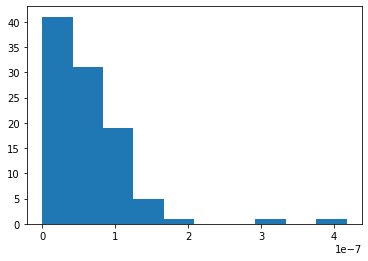

In [24]:
plt.hist(norms)
plt.show()

# Let's compare decompositions

In [76]:
from sktensor import dtensor, ktensor, cp_als

# torch_conv = torch_model[0].weight.data
torch_conv = np.transpose(torch_model[0].weight.data, (2, 3, 1, 0))
weight_torch = torch_conv.reshape(*torch_conv.shape[:2], -1)

T = dtensor(weight_torch)
np.random.seed(42)
P, fit, itr = cp_als(T, 2, init='random')

f_cout = np.array(P.U[0]) 
f_cin = np.array(P.U[1])
f_z = np.array(P.U[2]*P.lmbda)

In [77]:
f_cin, f_z, f_cout

(array([[0.46531149, 0.84620852],
        [0.90939574, 0.53285189]]),
 array([[1., 1.]]),
 array([[ 0.39022901, -0.94049301],
        [ 1.        , -0.43001791]]))

In [78]:
from sktensor import dtensor, ktensor, cp_als

# tf_conv = np.transpose(model.layers[0].get_weights()[0], (3, 2, 0, 1))
tf_conv = model.layers[0].get_weights()[0]
weight_tf = tf_conv.reshape((*tf_conv.shape[:2], -1))

T = dtensor(weight_tf)
np.random.seed(42)
P, fit, itr = cp_als(T, 2, init='random')

f_cout = np.array(P.U[0]) 
f_cin = np.array(P.U[1])
f_z = np.array(P.U[2]*P.lmbda)

In [79]:
f_cin, f_z, f_cout

(array([[0.46531149, 0.84620852],
        [0.90939574, 0.53285189]]),
 array([[1., 1.]]),
 array([[ 0.39022901, -0.94049301],
        [ 1.        , -0.43001791]]))